# Visual Analytics - Pandas Visualizations
Pandas has a built-in visualization library that builds off matplotlib. Here are some examples of what you can do with it.

#### Install necessary libraries

In [2]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import data

In [2]:
df1 = pd.DataFrame(np.random.randn(50,4), columns=['A','B','C','D'])
df1.head()

,A,B,C,D
0,0.144178,1.199894,-1.619167,1.229700
1,0.212162,-2.804972,1.056084,0.151437
2,0.906555,0.494043,-0.039032,-0.598432
3,1.102818,-0.353439,-0.358157,-0.077196
4,0.256099,1.566453,-1.162125,0.294695


`np.random.randn(50,4)`: It generates an array of random numbers with a shape of (50,4) using NumPy's random.randn() function. The numbers are sampled from a standard normal distribution (mean=0, standard deviation=1).

In [3]:
df2 = df1 + 10
df2.head()

,A,B,C,D
0,10.144178,11.199894,8.380833,11.229700
1,10.212162,7.195028,11.056084,10.151437
2,10.906555,10.494043,9.960968,9.401568
3,11.102818,9.646561,9.641843,9.922804
4,10.256099,11.566453,8.837875,10.294695


## Style

Matplotlib has several [style sheets](http://matplotlib.org/gallery.html#style_sheets) that can be used to alter the appearance of a plot. Just import matplotlib and use *plt.style.use()* prior to drawing a plot.

In this particular code, **plt.style.use('bmh')** sets the plotting style to 'bmh', which stands for "Bayesian Methods for Hackers." This style is one of the predefined styles available in Matplotlib. It provides a visually pleasing and distinctive look to the plots with a dark background and blue hues for lines and markers.

In [6]:
plt.style.use('bmh')

## Plot Types

There are several plot types built-in to pandas:

- df.plot.area     
- df.plot.barh     
- df.plot.density  
- df.plot.hist     
- df.plot.line     
- df.plot.scatter
- df.plot.bar      
- df.plot.box      
- df.plot.hexbin   
- df.plot.kde      
- df.plot.pie

These can also be called using the kind argument with plot, e.g. for hist, *df.plot(kind='hist')*. To make other plots with this style syntax, just set kind equal to one of the key terms in the list above (e.g., 'box','barh', etc.)

## Histogram

Use *df['col_name'].hist()* to plot a histogram of count values.

<AxesSubplot:ylabel='Frequency'>

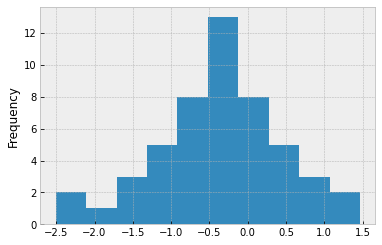

In [7]:
df1['A'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

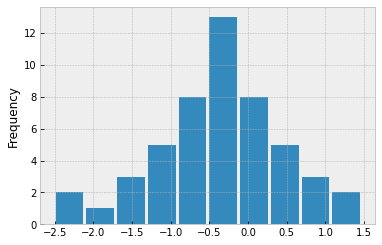

In [8]:
df1['A'].plot.hist(rwidth=0.9) # set width of each rectangle

<AxesSubplot:ylabel='Frequency'>

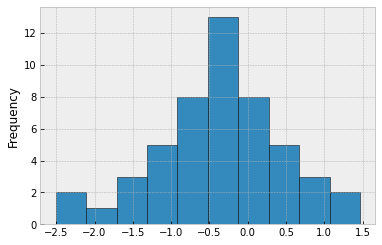

In [9]:
df1['A'].plot.hist(edgecolor="black") # set edge color to "black"

In [10]:
plt.style.use('dark_background') # change style

<AxesSubplot:>

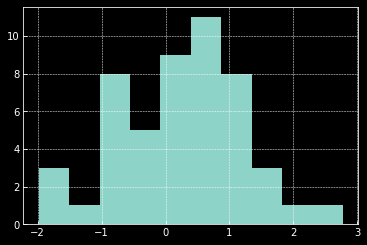

In [11]:
df1['B'].hist()

In [12]:
plt.style.use('ggplot')

The 'ggplot' style aims to replicate the aesthetics of the ggplot2 library, which is known for its clean and visually appealing plots. It features a gray background, white gridlines, and colored lines and markers. This style is popular for creating publication-quality plots and is often preferred for its simplicity and readability.

<AxesSubplot:ylabel='Frequency'>

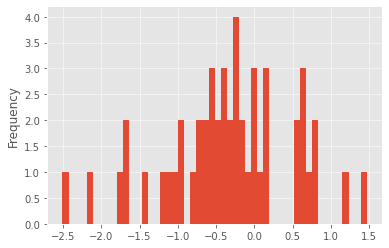

In [13]:
df1['A'].plot.hist(bins=50)

The parameter `bins=50` specifies that the histogram plot should be divided into 50 equally spaced bins to represent the range of values in the 'A' column.

## Area

plot.area(): This function is called on the DataFrame df2 to generate the area plot. The area() function specifically creates an area plot.

alpha=0.4: The alpha parameter controls the transparency of the plot. In this case, it is set to 0.4, which means the plotted areas will have a transparency of 0.4 (40% opaque).

<AxesSubplot:>

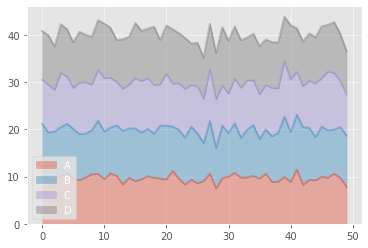

In [14]:
df2.plot.area(alpha=0.4)

## Barplots

<AxesSubplot:>

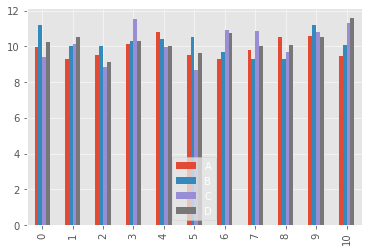

In [15]:
df2.loc[0:10].plot.bar()

`[0:10]`: It specifies the range of rows you want to select. In this case, it selects rows from index 0 to index 10 (inclusive).

### Stacked Bar plots

<AxesSubplot:>

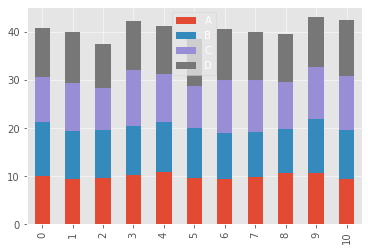

In [16]:
df2.loc[0:10].plot.bar(stacked=True)

## Line Plots

<AxesSubplot:>

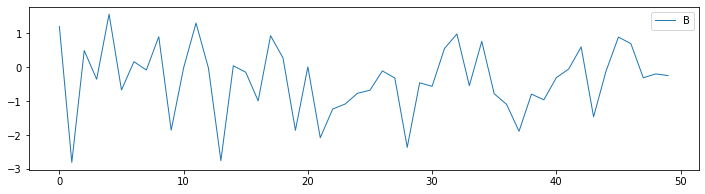

In [6]:
# lw=1: Specifies the line width of the plot. In this case, it is set to 1, indicating a thin line.
df1.plot.line(y='B',figsize=(12,3),lw=1)

## Scatter Plots

<AxesSubplot:xlabel='A', ylabel='B'>

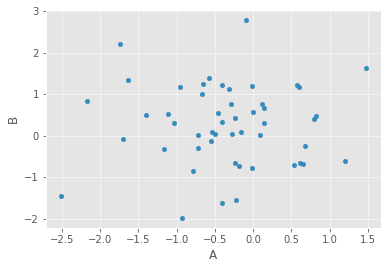

In [18]:
df1.plot.scatter(x='A',y='B')

### Color based on another column
You can color data to represent a third axis by using the 'c' argument. Here we color the points based on the 'C' column

cmap='coolwarm': Specifies the colormap to be used for coloring the markers based on the values in column 'C'. In this case, 'coolwarm' is the colormap name, which ranges from cool colors (e.g., blue) to warm colors (e.g., red).

<AxesSubplot:xlabel='A', ylabel='B'>

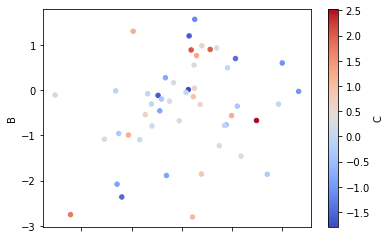

In [8]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

1. 'viridis': A perceptually uniform colormap that is often used as a default for its smooth variation in color.
2. 'plasma': A colormap with a vibrant range of colors that is particularly useful for representing ordered data.
3. 'magma': A colormap with a dark-to-light progression, useful for emphasizing low values.
4. 'inferno': A colormap with a bright-to-dark progression, useful for emphasizing high values.
5. 'cividis': A colormap designed to be easily interpreted by people with colorblindness, with a gradual transition from blue to yellow.

## BoxPlots

A box plot summarizes the distribution of a dataset by displaying the median, quartiles, and potential outliers. It provides a compact visual representation of the data's central tendency, spread, and skewness.

<AxesSubplot:>

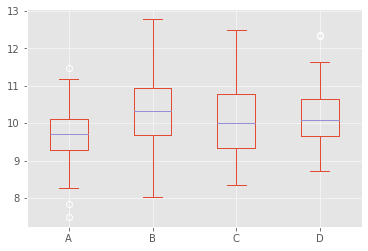

In [21]:
df2.plot.box()

## Hexagonal Bin Plot

This for useful for bivariate data.

A hexbin plot divides the plot area into hexagonal bins and uses color intensity to represent **the density or frequency** of data points within each bin. 

It helps visualize the **distribution and density** of data points, particularly in cases of large datasets or clustered data.

<AxesSubplot:xlabel='A', ylabel='B'>

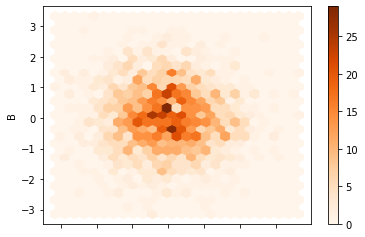

In [9]:
# create a dataframe called df3
df3 = pd.DataFrame(np.random.randn(2000, 2), columns=['A', 'B'])


df3.plot.hexbin(x='A',y='B',
                gridsize=25, # the size of the hexagonal graoh
                cmap='Oranges' # set the color
               )

## Kernel Density Estimation plot (KDE)

A Kernel Density Estimation plot (KDE plot) is a visualization technique that shows the **estimated probability density function** of a continuous random variable. It provides a smooth, continuous curve that represents the underlying distribution of the data.

<AxesSubplot:ylabel='Density'>

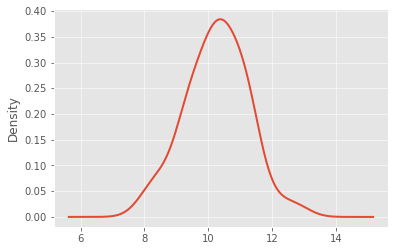

In [23]:
df2['B'].plot.kde()

<AxesSubplot:ylabel='Density'>

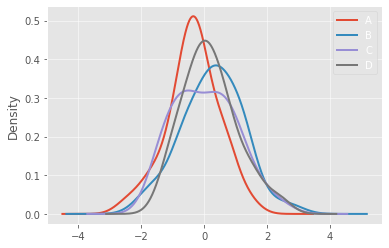

In [24]:
df1.plot.density()